<a href="https://colab.research.google.com/github/tranhuonggiang22/Data-preparation/blob/main/2_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

# Đặt vị trí các centroids bất kì
def put_centroids(k, data):
    arr = []
    for i in range(k):
        cen_1 = np.random.uniform(min(data[:,0]), max(data[:,0]))
        cen_2 = np.random.uniform(min(data[:,1]), max(data[:,1]))
        arr.append([cen_1, cen_2])
    return np.asarray(arr)

# Tạo màu cho chữ
class color:
   PURPLE = '\033[95m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
# Tính khoảng cách giữa 2 điểm bất kì
def distance(a, b):
    return np.sqrt(np.sum(np.square(a - b))

In [4]:
# Phân chia các điểm vào k nhóm
def assign_cluster(k, data, cen_arr):
    cluster = [-1] * len(data)
    for i in range(len(data)):
        distance_arr = []
        for j in range(k):
            # Tính khoảng cách các điểm đến k centroids
            distance_arr.append(distance(data[i], cen_arr[j]))
        new_group = np.argmin(distance_arr) # Chọn centroid gần nhất
        cluster[i] = new_group
    return np.asarray(cluster)

In [5]:
# Cập nhật lại vị trí các centroids
def recalculate(k, data, cluster):
    centroids = []
    for i in range(k):
        arr = []
        for j in range(len(data)):
            if cluster[j] == i:
                arr.append(data[j])
        centroids.append(np.mean(arr,axis=0))
    return np.asarray(centroids)

In [6]:
# Check xem bao giờ dừng
def check_stop(old_cen, new_cen):
    step = 0
    for a,b in zip(old_cen, new_cen):
        step = step + distance(a,b)
    return step

In [7]:
# Vẽ biểu đồ
def show_clusters(data, cluster, centroid):
    df = pd.DataFrame(dict(x=data[:,0], y=data[:,1], label=cluster))
    colors = {0:'orange', 1:'blue', 2:'green', 3:'brown'}
    fig, ax = plt.subplots(figsize=(8, 8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    ax.scatter(centroid[:,0], centroid[:,1], marker='*', s=140, c='#FF0000')
    plt.xlabel('X1', fontsize=14)
    plt.ylabel('X2', fontsize=14)
    plt.show()

In [8]:
# Hàm hoàn chỉnh
def k_means(k, data):
    old_cen = put_centroids(k, data)
    cluster = [0] * len(data)
    step = 100
    count = 0
    while step > 0.001:
        count += 1
        print(color.BOLD + color.UNDERLINE + color.PURPLE + "Step " + str(count) + color.END)
        cluster = assign_cluster(k, data, old_cen)
        #show_clusters(data, cluster, old_cen)
        new_cen = recalculate(k, data, cluster)
        step = check_stop(old_cen, new_cen)
        old_cen = new_cen
    show_clusters(data, cluster, old_cen)
    return cluster


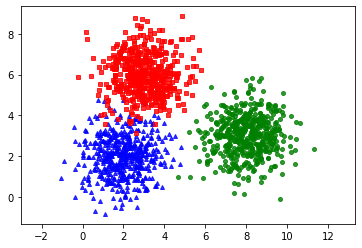

Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7
Step 8


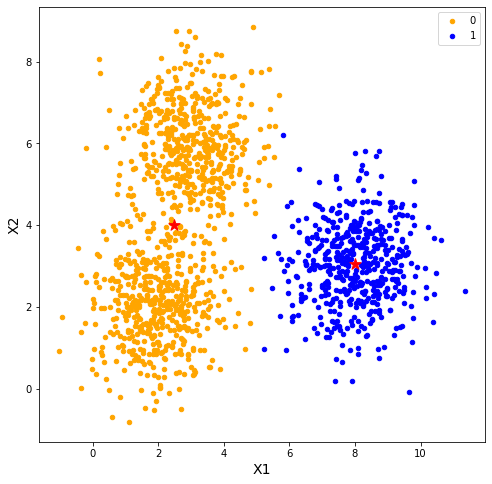

Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7


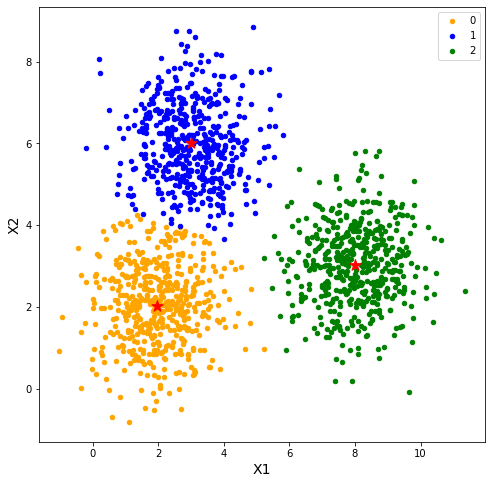

Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7
Step 8
Step 9
Step 10
Step 11
Step 12
Step 13
Step 14
Step 15
Step 16
Step 17
Step 18


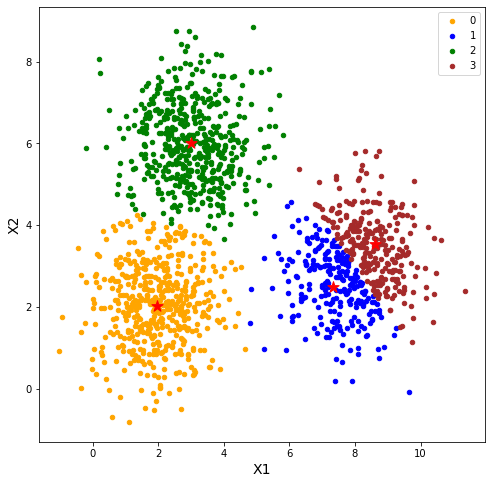

'\nNHẬN XÉT: \n- Với bộ data này, sau khi visualize ta có thể thấy chia data thành 3 nhóm là hợp lý nhất (k = 3).\n'

In [9]:
# Tạo data
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]

    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize=4, alpha=.8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize=4, alpha=.8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize=4, alpha=.8)

    plt.axis('equal')
    plt.plot()
    plt.show()

kmeans_display(X, original_label)

# Thử với k = 2, 3, 4
k_means(2, X)
k_means(3, X)
k_means(4, X)

"""
NHẬN XÉT: 
- Với bộ data này, sau khi visualize ta có thể thấy chia data thành 3 nhóm là hợp lý nhất (k = 3).
"""